In [4]:
import laspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from colorspacious import cspace_converter
import matplotlib as mpl
import scipy 

from pathlib import Path

base_path = Path('.')
list(base_path.glob('T*'))

file_name = "220829GO15D"
#change file name according to flight being analysed

base_dir = "C:/Hobbies/programming/data/"
#file_path = base_dir + file_name + '/' + file_name + "_C_A.las"
#use file_path below for multiple flights on one date and adjust carefully
file_path = "C:/Hobbies/programming/data/220829GO15D/22GOempty/" + file_name + "_EMPTY_C_A.las"

In [ ]:
def difference_file_name(tag1, tag2):
    return "height_differences_" + tag1 + "_" + tag2 + ".csv"

In [ ]:
file1 = "file_221101"
file2 = "file_221128"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')

In [ ]:
plt.hist(grid.values.flatten(), bins= np.linspace(0, 2, 300))
plt.ylim(0, 400)
plt.show()

In [ ]:
grid.values[~np.isnan(grid.values)]

In [ ]:
plt.figure(figsize = (20,20))
plt.imshow((grid.values > 0.8) & (grid.values < 0.9))


In [ ]:
plt.figure(figsize = (20,20))
plt.imshow(grid.values > 0.45)

In [ ]:
#extract the points that constitute graves based on height changes between empty graves on burial day and 2 weeks later.

grave_points = grid > 0.45

#grave_points.to_csv("grave_points_all.csv")

In [ ]:
#separate the points into individual graves and save all these tables individually
grave_true = grave_points.melt(ignore_index = False).reset_index()
grave_true = grave_true[(grave_true['grid_x'] > (6.2010*1e6)) & (grave_true['grid_x'] < (6.2025*1e6))]
grave_true = grave_true[grave_true['value']]
print(grave_true)
#grave_trim = 


In [ ]:
plt.hist(grave_true['grid_y']-1.0324e8, bins = np.linspace(3350, 5200, 300))
plt.show()

In [ ]:
plt.hist(grave_true['grid_y']-1.0324e8, bins = np.linspace(3600, 3800, 300))
plt.ylim(0,25)
plt.show()

In [ ]:

graves = {}

num_graves = 32

bottom = 3420+1.0324e8
top = 3460+1.0324e8

for i in range(1, num_graves+1):
    graves[f'T{i:02d}'] = grave_true[(grave_true['grid_y'] > bottom) & (grave_true['grid_y'] < top)]
    bottom = bottom + 60
    top = bottom + 40

print(graves['T03'])
    

In [ ]:
for name, value in graves.items():
    plt.hist(value['grid_y'], label = name)
    
plt.legend()

In [ ]:
for name, value in graves.items():
    value = value.drop(columns = ['value'])
    value.to_csv(name +'/grave_points.csv', index = False)

In [ ]:
flight = 'file_230119'
flight_indexed_by_grid = datasets[flight].set_index(['grid_y', 'grid_x'], drop = True)

print(grave_true)

for name in base_path.glob('T*'):
    this_grave = pd.read_csv(name / "grave_points.csv")
    ids = this_grave.set_index(['grid_y', 'grid_x']).index.intersection(flight_indexed_by_grid.index)
    tomb_points = flight_indexed_by_grid.loc[ids]
    tomb_points.to_csv(str(name) + '/' + flight + '_' + name.name + '.csv')


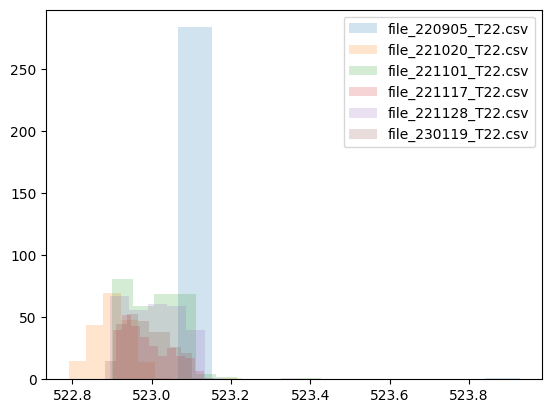

In [5]:
Tomb = Path('C:\Hobbies\programming\T22')
Flight_files = Tomb.glob('file_*')
for Flight_file in Flight_files: 
    if 'file_220829' in Flight_file.name: 
        continue
    dataset = pd.read_csv(Flight_file)
    plt.hist(dataset['z'], label = Flight_file.name, alpha = 0.2)
    
    
plt.legend()